# Entendimento 

In [226]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [227]:
#Carregando os dados
dados_classificacao = pd.read_csv('ingles_classificacao.csv')
dados_elenco = pd.read_csv('ingles_elencos.csv')

In [228]:
#Entendendo os dados
dados_classificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   posicao          380 non-null    int64  
 1   link             380 non-null    object 
 2   time             380 non-null    object 
 3   jogos            380 non-null    int64  
 4   vitorias         380 non-null    int64  
 5   empates          380 non-null    int64  
 6   derrotas         380 non-null    int64  
 7   golsFavor        380 non-null    int64  
 8   golsContra       380 non-null    int64  
 9   diferencaGols    380 non-null    int64  
 10  pts              380 non-null    int64  
 11  ano              380 non-null    int64  
 12  mediaGolsFavor   380 non-null    float64
 13  mediaGolsContra  380 non-null    float64
dtypes: float64(2), int64(10), object(2)
memory usage: 41.7+ KB


In [229]:
dados_classificacao.describe()

,posicao,jogos,vitorias,empates,derrotas,golsFavor,golsContra,diferencaGols,pts,ano,mediaGolsFavor,mediaGolsContra
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,10.500000,37.284211,13.984211,9.315789,13.984211,49.992105,49.992105,0.000000,51.244737,2012.000000,1.341459,1.342135
std,5.773884,3.052446,6.122303,2.957083,5.654033,16.064265,13.597976,25.954598,17.642614,5.484447,0.418924,0.352713
min,1.000000,22.000000,1.000000,2.000000,0.000000,15.000000,15.000000,-69.000000,11.000000,2003.000000,0.526316,0.394737
25%,5.750000,38.000000,10.000000,7.000000,10.000000,39.000000,41.000000,-19.000000,39.000000,2007.000000,1.052632,1.098684
50%,10.500000,38.000000,12.000000,9.000000,15.000000,47.000000,51.000000,-6.000000,47.000000,2012.000000,1.236842,1.342105
75%,15.250000,38.000000,18.000000,11.000000,18.000000,59.000000,59.000000,16.000000,63.000000,2017.000000,1.578947,1.559211
max,20.000000,38.000000,32.000000,17.000000,29.000000,106.000000,89.000000,79.000000,100.000000,2021.000000,2.789474,2.342105


In [230]:
dados_classificacao.tail()

,posicao,link,time,jogos,vitorias,empates,derrotas,golsFavor,golsContra,diferencaGols,pts,ano,mediaGolsFavor,mediaGolsContra
375,16,/futebol/time/_/id/368/everton,EVERTON,23,6,4,13,28,40,-12,22,2021,1.217391,1.739130
376,17,/futebol/time/_/id/361/newcastle-united,NEWCASTLE UNITED,24,4,10,10,26,45,-19,22,2021,1.083333,1.875000
377,18,/futebol/time/_/id/395/watford,WATFORD,24,5,3,16,24,43,-19,18,2021,1.000000,1.791667
378,19,/futebol/time/_/id/379/burnley,BURNLEY,22,2,11,9,20,29,-9,17,2021,0.909091,1.318182
379,20,/futebol/time/_/id/381/norwich-city,NORWICH CITY,25,4,5,16,15,53,-38,17,2021,0.600000,2.120000


In [231]:
dados_classificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   posicao          380 non-null    int64  
 1   link             380 non-null    object 
 2   time             380 non-null    object 
 3   jogos            380 non-null    int64  
 4   vitorias         380 non-null    int64  
 5   empates          380 non-null    int64  
 6   derrotas         380 non-null    int64  
 7   golsFavor        380 non-null    int64  
 8   golsContra       380 non-null    int64  
 9   diferencaGols    380 non-null    int64  
 10  pts              380 non-null    int64  
 11  ano              380 non-null    int64  
 12  mediaGolsFavor   380 non-null    float64
 13  mediaGolsContra  380 non-null    float64
dtypes: float64(2), int64(10), object(2)
memory usage: 41.7+ KB


In [232]:
dados_elenco.describe()

,ANO
count,12047.000000
mean,2012.024902
std,5.389283
min,2003.000000
25%,2008.000000
50%,2012.000000
75%,2017.000000
max,2021.000000


In [233]:
dados_elenco.tail()

,NOME,POS,IDADE,ALT,POSICAO,NACIONALIDADE,JOGOS,SUBSTITUICAO,DEFESAS,GOLSOFRIDOS,ASSISTENCIAS,FALTASCOMETIDAS,FALTASOFRIDAS,CARTAOAMARELO,CARTAOVERMELHO,GOLS,TIME,ANO,FINALIZACOES,CHUTESGOL
12042,Kenny McLean23,M,29,1.83 m,68 kg,Escócia,10,1,NaN,NaN,0,1,12,1,0,0,/futebol/time/_/id/381/norwich-city,2021,13,3
12043,Christos Tzolis18,A,19,--,--,Grécia,4,3,NaN,NaN,0,1,1,0,0,0,/futebol/time/_/id/381/norwich-city,2021,0,0
12044,Teemu Pukki22,A,31,1.8 m,73 kg,Finlândia,11,0,NaN,NaN,0,7,14,1,0,3,/futebol/time/_/id/381/norwich-city,2021,16,5
12045,Joshua Sargent24,A,21,1.85 m,78 kg,Estados Unidos,10,4,NaN,NaN,0,3,12,0,0,0,/futebol/time/_/id/381/norwich-city,2021,7,0
12046,Adam Idah35,A,20,1.91 m,83 kg,Irlanda,8,8,NaN,NaN,0,0,1,0,0,0,/futebol/time/_/id/381/norwich-city,2021,2,1


In [234]:
dados_elenco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12047 entries, 0 to 12046
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NOME             12047 non-null  object
 1   POS              12047 non-null  object
 2   IDADE            12047 non-null  object
 3   ALT              12047 non-null  object
 4   POSICAO          12047 non-null  object
 5   NACIONALIDADE    12047 non-null  object
 6   JOGOS            12047 non-null  object
 7   SUBSTITUICAO     12047 non-null  object
 8   DEFESAS          1364 non-null   object
 9   GOLSOFRIDOS      1364 non-null   object
 10  ASSISTENCIAS     12047 non-null  object
 11  FALTASCOMETIDAS  12047 non-null  object
 12  FALTASOFRIDAS    12047 non-null  object
 13  CARTAOAMARELO    12047 non-null  object
 14  CARTAOVERMELHO   12047 non-null  object
 15  GOLS             10683 non-null  object
 16  TIME             12047 non-null  object
 17  ANO              12047 non-null

In [235]:
#Verificando os nomes das equipas
dados_classificacao.time.unique()

array(['ARSENAL', 'CHELSEA', 'MANCHESTER UNITED', 'LIVERPOOL',
       'NEWCASTLE UNITED', 'ASTON VILLA', 'CHARLTON ATHLETIC',
       'BOLTON WANDERERS', 'FULHAM', 'BIRMINGHAM CITY', 'MIDDLESBROUGH',
       'SOUTHAMPTON', 'PORTSMOUTH', 'TOTTENHAM HOTSPUR',
       'BLACKBURN ROVERS', 'MANCHESTER CITY', 'EVERTON', 'LEICESTER CITY',
       'LEEDS UNITED', 'WOLVERHAMPTON WANDERERS', 'WEST BROMWICH ALBION',
       'CRYSTAL PALACE', 'NORWICH CITY', 'WEST HAM UNITED',
       'WIGAN ATHLETIC', 'SUNDERLAND', 'READING', 'SHEFFIELD UNITED',
       'WATFORD', 'DERBY COUNTY', 'STOKE CITY', 'HULL CITY', 'BURNLEY',
       'BLACKPOOL', 'SWANSEA CITY', 'QUEENS PARK RANGERS', 'CARDIFF CITY',
       'AFC BOURNEMOUTH', 'BRIGHTON & HOVE ALBION', 'HUDDERSFIELD TOWN',
       'BRENTFORD'], dtype=object)

In [236]:
#Padronizando os nomes das equipas para minuscula
dados_classificacao['time'] = dados_classificacao['time'].str.lower() 
dados_classificacao.time.unique()  

array(['arsenal', 'chelsea', 'manchester united', 'liverpool',
       'newcastle united', 'aston villa', 'charlton athletic',
       'bolton wanderers', 'fulham', 'birmingham city', 'middlesbrough',
       'southampton', 'portsmouth', 'tottenham hotspur',
       'blackburn rovers', 'manchester city', 'everton', 'leicester city',
       'leeds united', 'wolverhampton wanderers', 'west bromwich albion',
       'crystal palace', 'norwich city', 'west ham united',
       'wigan athletic', 'sunderland', 'reading', 'sheffield united',
       'watford', 'derby county', 'stoke city', 'hull city', 'burnley',
       'blackpool', 'swansea city', 'queens park rangers', 'cardiff city',
       'afc bournemouth', 'brighton & hove albion', 'huddersfield town',
       'brentford'], dtype=object)

In [237]:
#Retirar acentos nos nomes das equipas
#dados_classificacao['time'] = dados_classificacao['time'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

#Retirando qualquer pontuação nos nomes das equipas
dados_classificacao['time'] = dados_classificacao['time'].str.replace('[^\w\s]','',regex=True)

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Elvis\AppData\Local\Temp\ipykernel_36700\1950647091.py:5: SyntaxWarning: invalid escape sequence '\w'
  dados_classificacao['time'] = dados_classificacao['time'].str.replace('[^\w\s]','',regex=True)


In [238]:
dados_classificacao.time.unique()

array(['arsenal', 'chelsea', 'manchester united', 'liverpool',
       'newcastle united', 'aston villa', 'charlton athletic',
       'bolton wanderers', 'fulham', 'birmingham city', 'middlesbrough',
       'southampton', 'portsmouth', 'tottenham hotspur',
       'blackburn rovers', 'manchester city', 'everton', 'leicester city',
       'leeds united', 'wolverhampton wanderers', 'west bromwich albion',
       'crystal palace', 'norwich city', 'west ham united',
       'wigan athletic', 'sunderland', 'reading', 'sheffield united',
       'watford', 'derby county', 'stoke city', 'hull city', 'burnley',
       'blackpool', 'swansea city', 'queens park rangers', 'cardiff city',
       'afc bournemouth', 'brighton  hove albion', 'huddersfield town',
       'brentford'], dtype=object)

In [239]:
#Retirando os espaços em brancos duplicados
#dados_classificacao['time'] = dados_classificacao['time'].str.replace(' ','',regex=True)

dados_classificacao.time=dados_classificacao.time.replace("\\s+"," ",regex=True)

In [240]:
dados_classificacao.time.unique()

array(['arsenal', 'chelsea', 'manchester united', 'liverpool',
       'newcastle united', 'aston villa', 'charlton athletic',
       'bolton wanderers', 'fulham', 'birmingham city', 'middlesbrough',
       'southampton', 'portsmouth', 'tottenham hotspur',
       'blackburn rovers', 'manchester city', 'everton', 'leicester city',
       'leeds united', 'wolverhampton wanderers', 'west bromwich albion',
       'crystal palace', 'norwich city', 'west ham united',
       'wigan athletic', 'sunderland', 'reading', 'sheffield united',
       'watford', 'derby county', 'stoke city', 'hull city', 'burnley',
       'blackpool', 'swansea city', 'queens park rangers', 'cardiff city',
       'afc bournemouth', 'brighton hove albion', 'huddersfield town',
       'brentford'], dtype=object)

# Preparando o DataSet Elencos

In [241]:
#Dividindo o texto com base no /
dados_elenco.TIME.unique()

array(['/futebol/time/_/id/359/arsenal', '/futebol/time/_/id/363/chelsea',
       '/futebol/time/_/id/360/manchester-united',
       '/futebol/time/_/id/364/liverpool',
       '/futebol/time/_/id/361/newcastle-united',
       '/futebol/time/_/id/362/aston-villa',
       '/futebol/time/_/id/372/charlton-athletic',
       '/futebol/time/_/id/358/bolton-wanderers',
       '/futebol/time/_/id/370/fulham',
       '/futebol/time/_/id/392/birmingham-city',
       '/futebol/time/_/id/369/middlesbrough',
       '/futebol/time/_/id/376/southampton',
       '/futebol/time/_/id/385/portsmouth',
       '/futebol/time/_/id/367/tottenham-hotspur',
       '/futebol/time/_/id/365/blackburn-rovers',
       '/futebol/time/_/id/382/manchester-city',
       '/futebol/time/_/id/368/everton',
       '/futebol/time/_/id/375/leicester-city',
       '/futebol/time/_/id/357/leeds-united',
       '/futebol/time/_/id/380/wolverhampton-wanderers',
       '/futebol/time/_/id/383/west-bromwich-albion',
       '/futeb

In [242]:
#Dividindo o texto com base no /
print(dados_elenco.TIME[45].split("/"))
print(dados_elenco.TIME[45].split("/")[6])

['', 'futebol', 'time', '_', 'id', '363', 'chelsea']
chelsea


In [243]:
#Aplicando a divisão a todos os elementos
dados_elenco.TIME = dados_elenco.TIME.apply(lambda x: x.split("/")[6])

#Retirando qualquer pontuação nos nomes das equipas
dados_elenco.TIME = dados_elenco.TIME.replace('[^\w\s]',' ',regex=True)

#Retirando espaços em branco duplicados
dados_elenco.TIME = dados_elenco.TIME.replace("\\s+"," ",regex=True)

dados_elenco.TIME.unique()

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Elvis\AppData\Local\Temp\ipykernel_36700\1974098970.py:5: SyntaxWarning: invalid escape sequence '\w'
  dados_elenco.TIME = dados_elenco.TIME.replace('[^\w\s]',' ',regex=True)


array(['arsenal', 'chelsea', 'manchester united', 'liverpool',
       'newcastle united', 'aston villa', 'charlton athletic',
       'bolton wanderers', 'fulham', 'birmingham city', 'middlesbrough',
       'southampton', 'portsmouth', 'tottenham hotspur',
       'blackburn rovers', 'manchester city', 'everton', 'leicester city',
       'leeds united', 'wolverhampton wanderers', 'west bromwich albion',
       'crystal palace', 'norwich city', 'west ham united',
       'wigan athletic', 'sunderland', 'reading', 'sheffield united',
       'watford', 'derby county', 'stoke city', 'hull city', 'burnley',
       'blackpool', 'swansea city', 'queens park rangers', 'cardiff city',
       'afc bournemouth', 'brighton hove albion', 'huddersfield town',
       'brentford'], dtype=object)

In [244]:
print(dados_elenco.IDADE.unique())
pd.to_numeric(dados_elenco.IDADE, errors='coerce')

['44' '35' '51' '40' '38' '47' '36' '37' '45' '48' '43' '34' '52' '49'
 '53' '41' '46' '39' '42' '19' '50' '21' '28' '23' '54' '60' '25' '55'
 '26' '33' '30' '113' '--' '29' '32' '31' '27' '20' '24' '18' '22' '17']


0        44.0
1        35.0
2        51.0
3        40.0
4        38.0
         ... 
12042    29.0
12043    19.0
12044    31.0
12045    21.0
12046    20.0
Name: IDADE, Length: 12047, dtype: float64

In [245]:
dados_elenco.head()
#Retirar a letra m no valor do atributo ALT
dados_elenco.ALT = dados_elenco.ALT.str.replace('m','',regex=True)

#Retirar a letra kg no valor do atributo PESO
dados_elenco.POSICAO = dados_elenco.POSICAO.str.replace('kg','',regex=True)

dados_elenco.head()

,NOME,POS,IDADE,ALT,POSICAO,NACIONALIDADE,JOGOS,SUBSTITUICAO,DEFESAS,GOLSOFRIDOS,ASSISTENCIAS,FALTASCOMETIDAS,FALTASOFRIDAS,CARTAOAMARELO,CARTAOVERMELHO,GOLS,TIME,ANO,FINALIZACOES,CHUTESGOL
0,Manuel Almunia,G,44,1.91,86,Espanha,--,--,--,--,--,--,--,--,--,NaN,arsenal,2003,NaN,NaN
1,Mark Howard,G,35,1.83,76,Inglaterra,--,--,--,--,--,--,--,--,--,NaN,arsenal,2003,NaN,NaN
2,Jens Lehmann1,G,51,1.91,87,Alemanha,38,0,224,0,0,2,16,2,0,NaN,arsenal,2003,NaN,NaN
3,Stuart Taylor13,G,40,1.96,79,Inglaterra,--,--,--,--,--,--,--,--,--,NaN,arsenal,2003,NaN,NaN
4,Ryan Garry,D,38,1.88,82,Inglaterra,--,--,NaN,NaN,--,--,--,--,--,--,arsenal,2003,--,--


In [246]:
#Adicionar todas os atributos que seriam numericos numa lista
colunas_numericas = [ 'IDADE','ALT', 'POSICAO', 'JOGOS',
       'SUBSTITUICAO', 'DEFESAS', 'GOLSOFRIDOS', 'ASSISTENCIAS',
       'FALTASCOMETIDAS', 'FALTASOFRIDAS', 'CARTAOAMARELO', 'CARTAOVERMELHO',
       'GOLS','FINALIZACOES', 'CHUTESGOL']

#Vamos transformar os dados em numericos da lista colunas_numericas

for coluna in colunas_numericas:
    print (coluna)
    dados_elenco[coluna]= dados_elenco[coluna].str.replace("[a-zA-Z]", "")
    dados_elenco[coluna] = pd.to_numeric(dados_elenco[coluna], errors='coerce')



IDADE
ALT
POSICAO
JOGOS


SUBSTITUICAO
DEFESAS
GOLSOFRIDOS
ASSISTENCIAS
FALTASCOMETIDAS
FALTASOFRIDAS
CARTAOAMARELO
CARTAOVERMELHO
GOLS
FINALIZACOES
CHUTESGOL


In [247]:
dados_elenco.head()

,NOME,POS,IDADE,ALT,POSICAO,NACIONALIDADE,JOGOS,SUBSTITUICAO,DEFESAS,GOLSOFRIDOS,ASSISTENCIAS,FALTASCOMETIDAS,FALTASOFRIDAS,CARTAOAMARELO,CARTAOVERMELHO,GOLS,TIME,ANO,FINALIZACOES,CHUTESGOL
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,arsenal,2003,NaN,NaN
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,arsenal,2003,NaN,NaN
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,38.0,0.0,224.0,0.0,0.0,2.0,16.0,2.0,0.0,NaN,arsenal,2003,NaN,NaN
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,arsenal,2003,NaN,NaN
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,arsenal,2003,NaN,NaN


In [248]:
dados_elenco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12047 entries, 0 to 12046
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NOME             12047 non-null  object 
 1   POS              12047 non-null  object 
 2   IDADE            12016 non-null  float64
 3   ALT              11664 non-null  float64
 4   POSICAO          11514 non-null  float64
 5   NACIONALIDADE    12047 non-null  object 
 6   JOGOS            9943 non-null   float64
 7   SUBSTITUICAO     9943 non-null   float64
 8   DEFESAS          1090 non-null   float64
 9   GOLSOFRIDOS      1090 non-null   float64
 10  ASSISTENCIAS     9943 non-null   float64
 11  FALTASCOMETIDAS  9943 non-null   float64
 12  FALTASOFRIDAS    9943 non-null   float64
 13  CARTAOAMARELO    9943 non-null   float64
 14  CARTAOVERMELHO   9943 non-null   float64
 15  GOLS             8853 non-null   float64
 16  TIME             12047 non-null  object 
 17  ANO         

In [249]:
#Selecionando atributos de interesse
dados_elenco_select=dados_elenco[['NOME', 'POS', 'IDADE', 'ALT','POSICAO', 'NACIONALIDADE','TIME','ANO']]
dados_elenco_select.head()

,NOME,POS,IDADE,ALT,POSICAO,NACIONALIDADE,TIME,ANO
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003


Vamos dar um merge nos dados

In [250]:
#Vamos juntar as duas tabelas
dados_elenco_merge= dados_elenco_select.merge(dados_classificacao[['time','posicao','ano']],
                                              left_on=['TIME','ANO'], right_on=['time','ano'],
                                              how='inner').drop(columns=['time','ano'])

dados_elenco_merge.tail()


,NOME,POS,IDADE,ALT,POSICAO,NACIONALIDADE,TIME,ANO,posicao
12042,Kenny McLean23,M,29.0,1.83,68.0,Escócia,norwich city,2021,20
12043,Christos Tzolis18,A,19.0,NaN,NaN,Grécia,norwich city,2021,20
12044,Teemu Pukki22,A,31.0,1.80,73.0,Finlândia,norwich city,2021,20
12045,Joshua Sargent24,A,21.0,1.85,78.0,Estados Unidos,norwich city,2021,20
12046,Adam Idah35,A,20.0,1.91,83.0,Irlanda,norwich city,2021,20


In [251]:
dados_elenco_merge.rename(columns={'POS':"posicao_jogador", 'ALT':"altura_jogador", 'POSICAO':"peso_jogador", 'posicao':"classificacao_time"}, inplace=True)


In [252]:
dados_elenco_merge.head()

,NOME,posicao_jogador,IDADE,altura_jogador,peso_jogador,NACIONALIDADE,TIME,ANO,classificacao_time
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1


In [253]:
#Padronizando os nomes das colunas para minuscula
dados_elenco_merge.columns = dados_elenco_merge.columns.str.lower()

dados_elenco_merge.head()

,nome,posicao_jogador,idade,altura_jogador,peso_jogador,nacionalidade,time,ano,classificacao_time
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1


In [254]:
# Salavaando os dados finais
dados_elenco_merge.to_csv('dados_elenco_merge.csv', index=False)

# Feature Engineer

In [255]:
#Calculando media por ano e classificacao do time

media_classificacao_time=dados_elenco_merge.groupby(['ano','classificacao_time']).agg({'idade':'mean','altura_jogador':'mean', 'peso_jogador':'mean'}).reset_index()

media_classificacao_time.head()

,ano,classificacao_time,idade,altura_jogador,peso_jogador
0,2003,1,40.515152,1.831212,74.848485
1,2003,2,43.129032,1.815806,76.709677
2,2003,3,40.000000,1.813590,78.256410
3,2003,4,40.605263,1.828684,75.540541
4,2003,5,41.000000,1.799615,74.000000


# Exploração de Dados

In [256]:
media_classificacao_time.tail()

,ano,classificacao_time,idade,altura_jogador,peso_jogador
375,2021,16,26.032258,1.841600,77.280000
376,2021,17,26.892857,1.821154,76.884615
377,2021,18,27.285714,1.830000,74.960000
378,2021,19,28.370370,1.826667,74.826087
379,2021,20,25.074074,1.821250,74.086957


In [257]:
#verificar valores nulos nos dados
media_classificacao_time.isnull().sum()

ano                   0
classificacao_time    0
idade                 0
altura_jogador        0
peso_jogador          0
dtype: int64

In [258]:
#Mostrar garficamente os dados
media_classificacao_time.drop(columns=['classificacao_time','ano']).boxplot(figsize=(16,5))

<Axes: >

In [259]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharey=False)
fig.subplots_adjust(hspace=.7, wspace=0.2)
i=0
for j,c in enumerate(media_classificacao_time.columns):
    if c not in ['classificacao_time','ano']:
        sns.boxplot(x='classificacao_time', y=c,data=media_classificacao_time, ax=axs[i])
        axs[i].set_title(c)
        i+=1

In [260]:
#Matriz correlação
correlacao = media_classificacao_time.corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')



<Axes: title={'center': 'peso_jogador'}>

# Modelagem

In [261]:
#Dividindo em dados de tyreino e teste
X = media_classificacao_time.drop(columns=['ano','classificacao_time'])
y = media_classificacao_time.classificacao_time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [262]:
print(X_test)

         idade  altura_jogador  peso_jogador
266  30.666667        1.819615     75.384615
261  27.935484        1.818667     76.700000
265  28.969697        1.832188     74.750000
39   41.029412        1.829143     76.228571
33   41.346154        1.796154     74.769231
..         ...             ...           ...
137  33.103448        1.817037     74.769231
332  26.939394        1.819286     77.629630
351  27.433333        1.811786     76.444444
310  30.076923        1.846923     78.076923
167  34.258065        1.824516     76.193548

[114 rows x 3 columns]


In [263]:
print(X_train)

         idade  altura_jogador  peso_jogador
334  25.860465        1.818571     76.129032
341  25.468750        1.824688     74.928571
375  26.032258        1.841600     77.280000
289  29.708333        1.828750     79.125000
223  32.208333        1.829167     74.708333
..         ...             ...           ...
71   37.027027        1.830278     76.500000
106  39.000000        1.834688     77.937500
270  29.636364        1.831290     76.677419
348  25.000000        1.799259     72.238095
102  36.775000        1.827500     76.875000

[266 rows x 3 columns]


In [264]:
print(y_test)

266     7
261     2
265     6
39     20
33     14
       ..
137    18
332    13
351    12
310    11
167     8
Name: classificacao_time, Length: 114, dtype: int64


In [265]:
print(y_train)

334    15
341     2
375    16
289    10
223     4
       ..
71     12
106     7
270    11
348     9
102     3
Name: classificacao_time, Length: 266, dtype: int64


### Normalização

In [266]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_train.columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=X_test.columns)

In [267]:
X_test_scaler.head()


,idade,altura_jogador,peso_jogador
0,0.350679,0.590259,0.297912
1,0.220917,0.581892,0.422453
2,0.270053,0.701145,0.237827
3,0.843026,0.674291,0.377818
4,0.858075,0.383329,0.239648


In [268]:
print(X_test)

         idade  altura_jogador  peso_jogador
266  30.666667        1.819615     75.384615
261  27.935484        1.818667     76.700000
265  28.969697        1.832188     74.750000
39   41.029412        1.829143     76.228571
33   41.346154        1.796154     74.769231
..         ...             ...           ...
137  33.103448        1.817037     74.769231
332  26.939394        1.819286     77.629630
351  27.433333        1.811786     76.444444
310  30.076923        1.846923     78.076923
167  34.258065        1.824516     76.193548

[114 rows x 3 columns]


Modelo de Regressão Lógistica

In [269]:
#Regresão Logistica
modelo_LR = LogisticRegression(random_state=0)
modelo_LR.fit(X_train_scaler, y_train)

LogisticRegression(random_state=0)

##### Avaliando o modelo

In [270]:
modelo_LR.score(X_test_scaler, y_test)

0.02631578947368421

In [271]:
modelo_DT = DecisionTreeClassifier(random_state=0)
modelo_DT.fit(X_train_scaler, y_train)

DecisionTreeClassifier(random_state=0)

In [272]:
#Avaliando o modelo
modelo_DT.score(X_test_scaler, y_test)

0.07017543859649122

#Aplicar o modelo

In [273]:
modeloRF= RandomForestClassifier(n_estimators=100, random_state=0)
modeloRF.fit(X_train_scaler, y_train)



RandomForestClassifier(random_state=0)

In [274]:
modeloRF.score(X_test_scaler, y_test)

0.07017543859649122

In [275]:
#Testar o modelo
from sklearn.metrics import accuracy_score
teste_RF = modeloRF.predict(X_test_scaler)
print(f"Random Forest Accuracy: {accuracy_score(y_test, teste_RF):.2f}")

Random Forest Accuracy: 0.07


In [276]:
# Gradient Boosting
modeloGB = GradientBoostingClassifier(random_state=0)
modeloGB.fit(X_train_scaler, y_train)

GradientBoostingClassifier(random_state=0)

In [277]:
modeloGB.score(X_test_scaler, y_test)

0.043859649122807015

Como o modelo não está a a+resentar os melhores desempenhos, vamos recomeçar o processo de Feature Enginier

In [278]:
#Aplicar o modelo 
dados_elenco_merge.head()

,nome,posicao_jogador,idade,altura_jogador,peso_jogador,nacionalidade,time,ano,classificacao_time
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1


Criando uma nova classe para agrupar

In [279]:
dados_elenco_merge['classificacao_time2']= pd.cut(dados_elenco_merge.classificacao_time,[1,5,17,20], include_lowest=True, labels=False)

In [280]:
dados_elenco_merge.tail()

,nome,posicao_jogador,idade,altura_jogador,peso_jogador,nacionalidade,time,ano,classificacao_time,classificacao_time2
12042,Kenny McLean23,M,29.0,1.83,68.0,Escócia,norwich city,2021,20,2
12043,Christos Tzolis18,A,19.0,NaN,NaN,Grécia,norwich city,2021,20,2
12044,Teemu Pukki22,A,31.0,1.80,73.0,Finlândia,norwich city,2021,20,2
12045,Joshua Sargent24,A,21.0,1.85,78.0,Estados Unidos,norwich city,2021,20,2
12046,Adam Idah35,A,20.0,1.91,83.0,Irlanda,norwich city,2021,20,2


In [281]:
#Validando se a nova variavel de classificação está certa
dados_elenco_merge.loc[:,'estrangeiro']=dados_elenco_merge.nacionalidade.apply(lambda x:1 if x!= 'Inglaterra' else 0)


In [282]:
dados_elenco_merge.tail()

,nome,posicao_jogador,idade,altura_jogador,peso_jogador,nacionalidade,time,ano,classificacao_time,classificacao_time2,estrangeiro
12042,Kenny McLean23,M,29.0,1.83,68.0,Escócia,norwich city,2021,20,2,1
12043,Christos Tzolis18,A,19.0,NaN,NaN,Grécia,norwich city,2021,20,2,1
12044,Teemu Pukki22,A,31.0,1.80,73.0,Finlândia,norwich city,2021,20,2,1
12045,Joshua Sargent24,A,21.0,1.85,78.0,Estados Unidos,norwich city,2021,20,2,1
12046,Adam Idah35,A,20.0,1.91,83.0,Irlanda,norwich city,2021,20,2,1


In [283]:
 #Criando uma coluna com flag para indicar se o jogador é estrangeiro ou não, usando o loc
dados_elenco_merge.loc[:,'estrangeiro']=dados_elenco_merge.nacionalidade.apply(lambda x:1 if x!= 'Inglaterra' else 0)
dados_elenco_merge.head()

,nome,posicao_jogador,idade,altura_jogador,peso_jogador,nacionalidade,time,ano,classificacao_time,classificacao_time2,estrangeiro
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1,0,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1,0,0
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1,0,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1,0,0
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1,0,0


In [284]:
#Calcular a media dos atributos com base na nova classificação
media_classificacao_time2=dados_elenco_merge.groupby(['ano','classificacao_time2']).agg({'idade':'mean','altura_jogador':'mean', 'peso_jogador':'mean'}).reset_index()

In [285]:
media_classificacao_time2.head()

,ano,classificacao_time2,idade,altura_jogador,peso_jogador
0,2003,0,40.976190,1.818743,76.018072
1,2003,1,42.373178,1.821686,77.077151
2,2003,2,42.301370,1.812329,76.712329
3,2004,0,40.067485,1.828354,77.558282
4,2004,1,41.632836,1.822275,77.241791


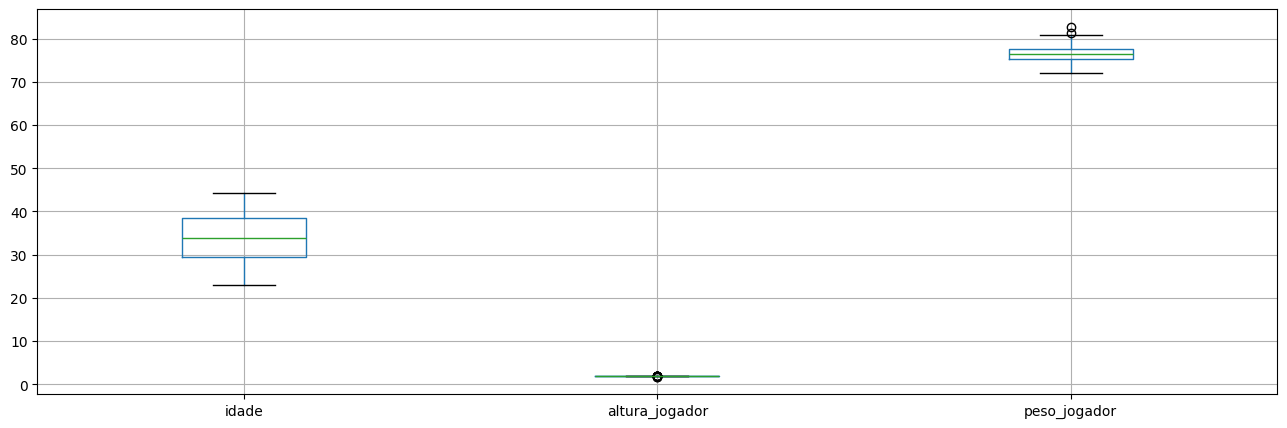

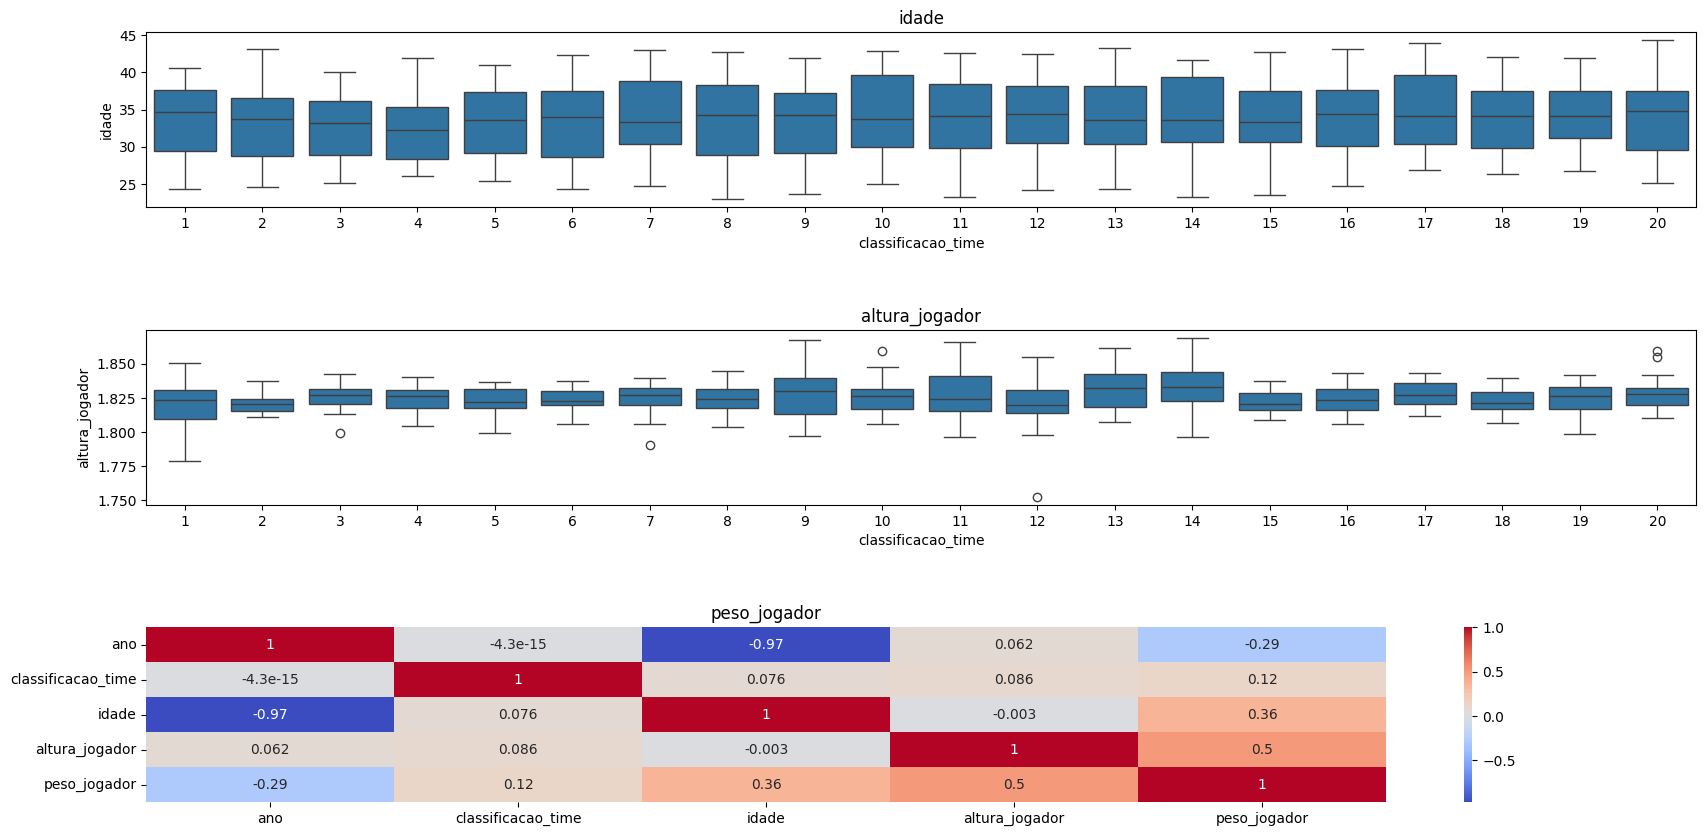

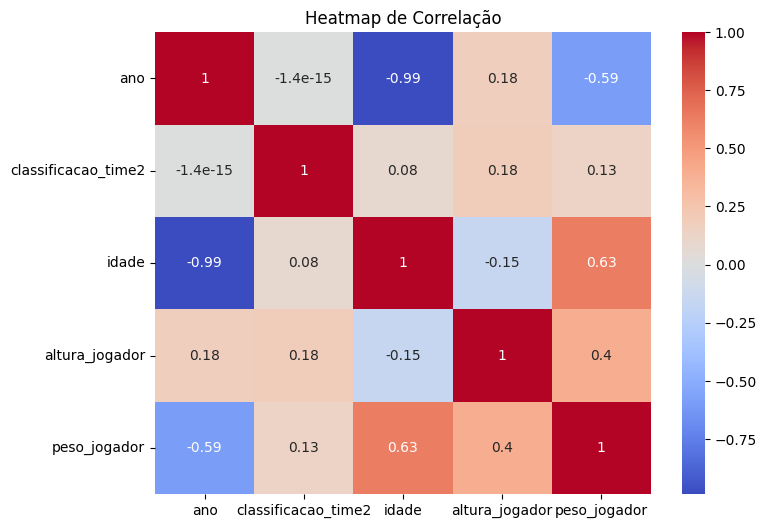

In [286]:
#Mostrar a correlação dos dados
correlacao2 = media_classificacao_time2.corr()

#Mostrar visualmente 
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao2, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()

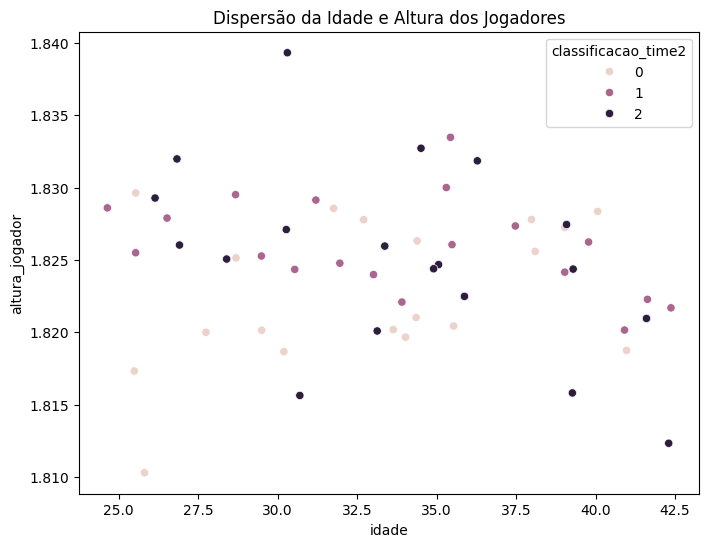

In [287]:
#Faça um grafico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(data=media_classificacao_time2, x='idade', y='altura_jogador', hue='classificacao_time2')
plt.title('Dispersão da Idade e Altura dos Jogadores')
plt.show()



In [288]:
media_classificacao_time2.head(10)

,ano,classificacao_time2,idade,altura_jogador,peso_jogador
0,2003,0,40.976190,1.818743,76.018072
1,2003,1,42.373178,1.821686,77.077151
2,2003,2,42.301370,1.812329,76.712329
3,2004,0,40.067485,1.828354,77.558282
4,2004,1,41.632836,1.822275,77.241791
5,2004,2,41.602410,1.820952,76.904762
6,2005,0,39.031250,1.827250,76.925000
7,2005,1,40.911585,1.820153,77.088685
8,2005,2,39.295775,1.824366,77.070423
9,2006,0,38.100592,1.825588,76.829412


In [289]:
dados_elenco_merge.head()

,nome,posicao_jogador,idade,altura_jogador,peso_jogador,nacionalidade,time,ano,classificacao_time,classificacao_time2,estrangeiro
0,Manuel Almunia,G,44.0,1.91,86.0,Espanha,arsenal,2003,1,0,1
1,Mark Howard,G,35.0,1.83,76.0,Inglaterra,arsenal,2003,1,0,0
2,Jens Lehmann1,G,51.0,1.91,87.0,Alemanha,arsenal,2003,1,0,1
3,Stuart Taylor13,G,40.0,1.96,79.0,Inglaterra,arsenal,2003,1,0,0
4,Ryan Garry,D,38.0,1.88,82.0,Inglaterra,arsenal,2003,1,0,0


In [290]:
#Qantidade de jogadores nos elencos para as respectivas posições na classificação

qtd_jogadores_posicao = dados_elenco_merge.groupby(['ano','classificacao_time2']).nome.count().reset_index().rename(columns={'nome':'qtd_jogadores'})
qtd_jogadores_posicao.head()

,ano,classificacao_time2,qtd_jogadores
0,2003,0,168
1,2003,1,343
2,2003,2,73
3,2004,0,166
4,2004,1,340


In [291]:
qtd_jogadores_posicao=( dados_elenco_merge.groupby(['ano','classificacao_time2']).agg(
    {'nome':'count', 'time':'nunique'}).reset_index().rename(columns={'nome':'qtd_jogadores'}))
                       
                       

In [292]:
qtd_jogadores_posicao.head()

,ano,classificacao_time2,qtd_jogadores,time
0,2003,0,168,5
1,2003,1,343,12
2,2003,2,73,3
3,2004,0,166,5
4,2004,1,340,12


In [293]:
#Calculando a porcentagem de estrangeiro para cada posição na classificacao
perct_estrangeiro= dados_elenco_merge.groupby(['ano','classificacao_time2']).estrangeiro.value_counts(normalize=True)*100


In [294]:
perct_estrangeiro.head()

ano   classificacao_time2  estrangeiro
2003  0                    1              63.095238
                           0              36.904762
      1                    1              54.810496
                           0              45.189504
      2                    0              52.054795
Name: proportion, dtype: float64

In [295]:
#Convertendo em PD DF
pct_estrangeiro=pd.DataFrame(perct_estrangeiro)
pct_estrangeiro.head()

proportion
ano  classificacao_time2 estrangeiro            
2003 0                   1             63.095238
                         0             36.904762
     1                   1             54.810496
                         0             45.189504
     2                   0             52.054795

In [302]:
#Renomeando a coluna Estrangeiro
pct_estrangeiro= pct_estrangeiro.rename(columns={'proportion':'pct_estrangeiro'})

In [307]:
pct_estrangeiro.head()

pct_estrangeiro
ano  classificacao_time2 estrangeiro                 
2003 0                   1                  63.095238
                         0                  36.904762
     1                   1                  54.810496
                         0                  45.189504
     2                   0                  52.054795

In [309]:
pct_estrangeiro.reset_index(inplace=True)
pct_estrangeiro.head()

,index,ano,classificacao_time2,estrangeiro,pct_estrangeiro
0,0,2003,0,1,63.095238
1,1,2003,0,0,36.904762
2,2,2003,1,1,54.810496
3,3,2003,1,0,45.189504
4,4,2003,2,0,52.054795


In [310]:
#Mantendo apenas os dados de estrangeiros
pct_estrangeiro= pct_estrangeiro[pct_estrangeiro.estrangeiro==1]
pct_estrangeiro.head()

,index,ano,classificacao_time2,estrangeiro,pct_estrangeiro
0,0,2003,0,1,63.095238
2,2,2003,1,1,54.810496
5,5,2003,2,1,47.945205
6,6,2004,0,1,65.662651
8,8,2004,1,1,56.176471


In [311]:
media_final = pd.concat([media_classificacao_time2, qtd_jogadores_posicao, pct_estrangeiro], axis=1, join='inner')
media_final.head()

,ano,classificacao_time2,idade,altura_jogador,peso_jogador,ano,classificacao_time2,qtd_jogadores,time,index,ano,classificacao_time2,estrangeiro,pct_estrangeiro
0,2003,0,40.976190,1.818743,76.018072,2003,0,168,5,0,2003,0,1,63.095238
2,2003,2,42.301370,1.812329,76.712329,2003,2,73,3,2,2003,1,1,54.810496
5,2004,2,41.602410,1.820952,76.904762,2004,2,84,3,5,2003,2,1,47.945205
6,2005,0,39.031250,1.827250,76.925000,2005,0,160,5,6,2004,0,1,65.662651
8,2005,2,39.295775,1.824366,77.070423,2005,2,71,3,8,2004,1,1,56.176471


In [314]:
media_final = media_final.loc[:,~media_final.columns.duplicated()]
media_final.head()

,ano,classificacao_time2,idade,altura_jogador,peso_jogador,qtd_jogadores,time,index,estrangeiro,pct_estrangeiro
0,2003,0,40.976190,1.818743,76.018072,168,5,0,1,63.095238
2,2003,2,42.301370,1.812329,76.712329,73,3,2,1,54.810496
5,2004,2,41.602410,1.820952,76.904762,84,3,5,1,47.945205
6,2005,0,39.031250,1.827250,76.925000,160,5,6,1,65.662651
8,2005,2,39.295775,1.824366,77.070423,71,3,8,1,56.176471


Vamos fazer uma nova exploração

In [315]:
#Excluindo as colunas time,index,estrangeiro
media_final.drop(columns=['time','index','estrangeiro'], inplace=True)
media_final.head()

,ano,classificacao_time2,idade,altura_jogador,peso_jogador,qtd_jogadores,pct_estrangeiro
0,2003,0,40.976190,1.818743,76.018072,168,63.095238
2,2003,2,42.301370,1.812329,76.712329,73,54.810496
5,2004,2,41.602410,1.820952,76.904762,84,47.945205
6,2005,0,39.031250,1.827250,76.925000,160,65.662651
8,2005,2,39.295775,1.824366,77.070423,71,56.176471


Exploração dos Dados